### **Fourier Series**

Fourier Transform decompose the functions into sum of Sines and Cosines. 

Fourier Transform is a continous transformation from the function domain to the frequencies domain. 

Discrete Fourier Transform It's an approximation of Fourier Transform on vectors with finite many elements. 

**Major Claim**

> Consider a function $F(x)$ that is defined and have "good" behavior over the domain $[0, 2\pi]$, then there exists an unique the Fourier Series representation of the function over the domain: 

$$
F(x) = 
\sum_{i = 0}^{\infty}
a_n\sin\left(
    \frac{n\pi x}{L}
\right)
+ 
b_n\cos\left(
    \frac{n\pi x}{L}
\right) \quad \forall x \in [L, L]
$$

We can do this, because sums of $\sin$ is odd and sums of $\cos$ are even, and any function can be decomposed into the sum of an odd function and an even function. 


$$
F(x) = 
    \underbrace{
    \frac{1}{2}(F(x) + F(-x))}_{\text{Even}}
     +
    \underbrace{
    \frac{1}{2}(F(x) - F(-x))}_{\text{Odd}}
$$

By skipping hundreds of pages of real math, I make the claim that: 


$$
a_n = 
\frac{2}{L}\int_{0}^{L} F_o(x)\sin\left(
    \frac{nx\pi}{L}
\right)dx \quad \forall n \in \mathbb{N}
$$


$$
b_n = \frac{2}{L}\int_{0}^{L}
F_e(x)\cos\left(
    \frac{n\pi x}{L}
\right)
dx \quad \forall n \in \mathbb{N}
$$

And: 

$$
b_0 = \int_{-L}^{L} F(x)dx \quad a_0 = 0
$$

The smart thing is that, $F_e(x)$ and $F_o(x)$ can be replaced with $F(x)$ instead. Feel free to pause and think why this is true. (This is some Caculus, but you need to use the properties of odd and even function and integrating them over a symmetric interval around 0)





### **Discrete Fourier Consine Transform**

For any odd function on the domain $[-L, L]$, we can transform it using a $\sin$ series. 

If the function is on the $[0, L]$ domain, we can mirror it to $[-L, L]$ so that it's an odd function and then apply the Fourier Sine Series. 

In fact: 

$$
\int_{0}^{L} \sin\left(\frac{n\pi x}{L}\right)^2dx = \frac{L}{2}
$$

We will skip the math, But it's not hard if we use $\sin^2(x) = \frac{1}{2}(1 - \cos(2x))$. 


And we also consider the function $F(x)$ to be taking discrete value at points $0, \Delta x, 2\Delta x\cdots L - \Delta x, 1$. And 1 is equally partitioned by the value $\Delta x$. Let's say that $N = 1/\Delta x$, let's see a particular mode with fix number $n$. 

$$
a_n = 
\frac{2}{L}\int_{0}^{L} F_o(x)\sin\left(
    \frac{nx\pi}{L}
\right)dx \quad \forall n \in \mathbb{N}
$$

$$
a_n \approx \frac{2}{L} \sum_{j = 0}^{N}
F_j\sin\left(
    \frac{j\Delta xn \pi}{L}
    \right)
$$

Hm... 

> **Observe that ths is just a dot product between 2 vectors**. 

Similarlly: 

$$
 \frac{L}{2} \approx 
 \sum_{j = 0}^{N}
    \sin\left(
    \frac{j\Delta xn \pi}{L}
    \right)^2
$$


So, $a_n$ is approximately the dot product between the function $\sin(j\Delta x \pi)$

For your HW6, we have $L = 2\pi$

Let's view $F$ as just a vector, and $s$ to be the vector of 
$
s_j = \sin\left(\frac{j\Delta xn \pi}{L}
\right)
$

then the fourier series is like: 

$$
a_n = \frac{F^Ts}{s^Ts}
$$

The fourier approximation is just: 

$$
a_ns_j = \frac{F^Ts}{\Vert s\Vert^2}s
$$

Using $s= \Vert s\Vert_2 \hat{s}$, where $\hat{s}$ is the unit vector pointing towards the same direction as $s$, we can simplifies it to just a dot product with the unit vector $\hat{s}$. 

We do this for all the $n$, then we have a representation of the discrete vector $F$. 



### **Excercise: Code a Discrete Sine Transform Matrix**

For simplicity, let's assume that $L = 2\pi$, than we have the vector: 

$$
s_{n, j} = \sin \left(
    \frac{j n \Delta x}{2}
\right)
$$

Being the element at the $n$ th row and $j$ th entry of the matrix. 

(**Note**: I deliberately take the transpose of the matrix compare to what we had for HW6). 

Construct such a matrix, of significant sizes and plot the first n row out. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt


M, N = 10, 200



    

Let's visdualize the matrix better. 


### **Excercise: Write a Discrete Sine Fourier Transform Function**

Given a set of points under the domain $[0, 2\pi]$, and the number of partitions points partitioning the domain (includes the endpoints) N, return a Discrete Sine matrix with $M$ rows. 


### **Exercise: Try Transforming Some Functions**

The line functions. 

$$
f(x) = x \quad x \in [0, 2\pi]
$$



In [2]:
M, N = 10, 200



### **Artifacts of samplying from High Frequences Signals**


* Trying Changing the grid discretizations slighly.  


Theorem: 

For signal with frequence $f$, 2 times as many points are needed to detect the frequencies. 

If the sampled points is not enough, then High Frequencies will get detected as low frequencies. 

Take a loot at this meme [Meme](https://www.youtube.com/watch?v=Ozvwz7pnOK4), which an artifact of this phenomena. 


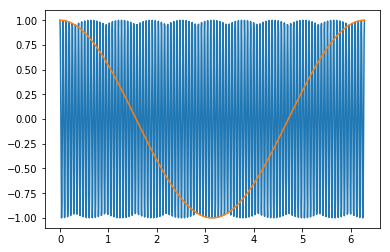

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
SparseGridPoints = np.linspace(0, 2*np.pi, 101)
DenseGridPoints = np.linspace(0, 2*np.pi, 1001)

plt.close()
plt.plot(DenseGridPoints, np.cos(99*DenseGridPoints))
plt.plot(SparseGridPoints, np.cos(99*SparseGridPoints))

### Curve Fitting: Code Review


**Objective:** 

* Let's give Professor's Kutz Variables some Better Names. During this process, we are figuring out what each variable means and what they suppose to represetns. 
* Let's also Add some comments explaining what is going on. 


In [4]:
import numpy as np
import matplotlib.pyplot as plt

Data = open("linefit.dat",'r')
X = Data.read()
print(X)



 0.0  1.1
 0.5  1.6
 1.1  2.4
 1.7  3.8
 2.1  4.3
 2.5  4.7
 2.9  4.8
 3.3  5.5
 3.7  6.1
 4.2  6.3
 4.9  7.1
 5.3  7.1
 6.0  8.2
 6.7  6.9
 7.0  5.3



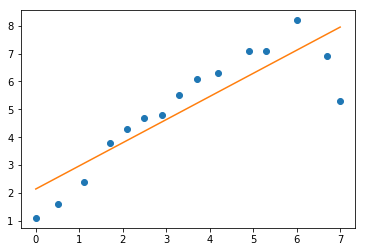

In [5]:
x = [0.0, 0.5, 1.1, 1.7, 2.1, 2.5, 2.9, 3.3, 3.7, 4.2, 4.9, 5.3, 6.0, 6.7, 7.0]
y = [1.1, 1.6, 2.4, 3.8, 4.3, 4.7, 4.8, 5.5, 6.1, 6.3, 7.1, 7.1, 8.2, 6.9, 5.3]

pcoeff = np.polyfit(x,y,1)
xp = np.arange(0,7.1,0.1)
yp = np.polyval(pcoeff,xp)

plt.plot(x,y,'o')
plt.plot(xp,yp)

0.5438549406784874


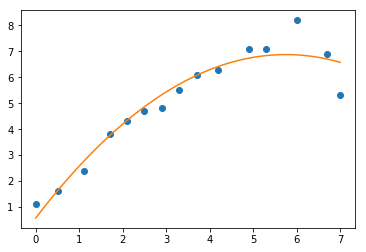

In [6]:
pcoeff2 = np.polyfit(x,y,2)
yp2 = np.polyval(pcoeff2,xp)

plt.plot(x,y,'o')
plt.plot(xp,yp2)

yp3 = np.polyval(pcoeff2,x); n=np.size(yp3)
E2 = np.sqrt( np.sum( np.abs(yp3-y)**2 )/n )
print(E2)


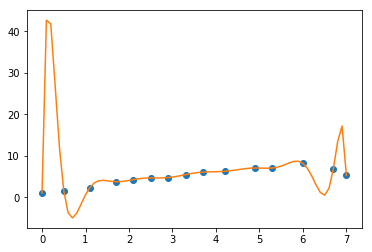

In [7]:
n = np.size(x)-1
pcoeffn = np.polyfit(x,y,n)
ypn = np.polyval(pcoeffn,xp)

plt.plot(x,y,'o')
plt.plot(xp,ypn)



### Interpolation: Code Review
 



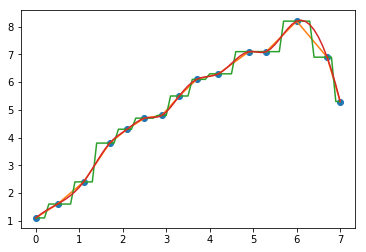

In [8]:
from scipy import interpolate
from scipy.interpolate import CubicSpline

f = interpolate.interp1d(x, y); yint=f(xp)
f2 = interpolate.interp1d(x, y,'nearest'); yint2=f2(xp)
spl = CubicSpline(x, y); yint3 = spl(xp)

plt.plot(x,y,'o',xp,yint,xp,yint2,xp,yint3)

### Generalized 2 Norm Model Fits Via Non Convex Minimizations: Code Review



Optimization terminated successfully.
         Current function value: 0.595958
         Iterations: 41
         Function evaluations: 77


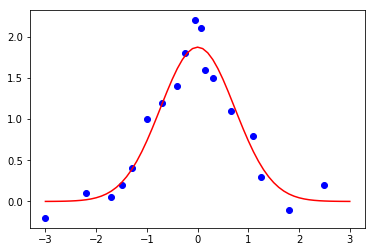

In [9]:
from pylab import *
from numpy import *
from numpy.random import normal
from scipy.optimize import fmin

x=[-3.0000, -2.2000, -1.7000, -1.5000, -1.3000, -1.0000, -0.7000, -0.4000,-0.2500, -0.0500, 0.0700, 0.1500, 0.3000, 0.6500, 1.1000, 1.2500, 1.8000, 2.5000]
y=[-0.2000, 0.1000, 0.0500, 0.2000, 0.4000, 1.0000, 1.2000, 1.4000, 1.8000, 2.2000, 2.1000, 1.6000, 1.5000, 1.1000, 0.8000, 0.3000, -0.1000, 0.2000]
x=array(x)
y=array(y)

gauss_fit = lambda c, x: c[0]*np.exp(-c[1]*x*x)
e = lambda p, x, y: (abs((gauss_fit(p,x)-y))**2).sum()
p = fmin(e, [1,1], args=(x,y))

xp=np.arange(-3,3.1,0.1)
plot(x,y,'bo', xp, gauss_fit(p,xp),'r')

